In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Class 10: Stochastic Time Series Processes

Most models of the business cycle are *stochastic* time series models. That is, the models incorporate randomness as a determinant of equilibrium. Randomness is necessary for two reasons. First, from a practical point of view, any model will be incomplete and will not fit the data perfectly and so randomness in a macroeconomic model is analagous to an error term in an OLS model. Second, from a philosophical perspective, randomness in a macroeconomic model reflects economists' consensus that fundamentally unpredictable forces cause the business cycle.


## Simulating Normal Random Variables with Numpy

Recall that the `numpy.random` module has functions for generating (pseudo) random variables. Learn more about the module by reading the documentation: https://docs.scipy.org/doc/numpy/reference/routines.random.html

We use the `numpy.random.normal()` function to crate arrays of random draws from the normal distribution. The function takes three arguments:
* `loc`: the mean of the distribution (default=0)
* `scale`: the standard deviation of the distribution (default=1)
* `size`: how many to numbers to draw (default = `None`)

The default is to draw numbers from the *standard normal* distribution.

### Example

Draw 500 values each from the $\mathcal{N}(0,1)$ and $\mathcal{N}(0,2^2)$ distributions. Plot.

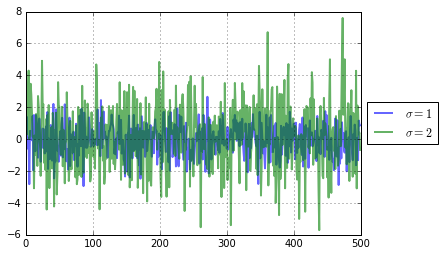

In [2]:
# Set the seed for the random number generator to 126
np.random.seed(126)

# Create two arrays:
#     x: 500 draws from the normal(0,1) distribution
#     y: 500 draws from the normal(0,4) distribution
x = np.random.normal(loc=0,scale=1,size=500)
y = np.random.normal(loc=0,scale=2,size=500)

# Plot x and y
plt.plot(x,lw=2,alpha = 0.6,label='$\sigma=1$')
plt.plot(y,lw=2,alpha = 0.6,label='$\sigma=2$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

## The White Noise Process

In the previous example, we created two variables that stored draws from normal distrbutions with means of zero but with different standard deviations. Both of the variables were simulations of *white noise processes*. A white noise process is a random variable $\epsilon_t$ with constant mean and constant variance. We are concerned only with the zero-mean white noise process and we'll denote that a variable is a zero-mean white noise process with the following shorthand notation:

\begin{align}
\epsilon_t & \sim \text{WN}(0,\sigma^2),
\end{align}

where $\sigma^2$ is the variance of the processes. Strictly speaking, a white noise process can follow any distribution as long as the mean and variance are constant, but we'll concentrate exclusively white noise process drawn from the normal distribution.

## The AR(1) Process

A random variable $y_t$ is an *autoregressive process of order 1*  or AR(1) process if it can be written in the following form:

\begin{align}
y_t & = \rho y_{t-1} + \epsilon_t,
\end{align}

where $\rho$ is a constant and $\epsilon \sim \text{WN}(0,\sigma^2)$. The AR(1) process is the stochastic analog of the first-order difference equation where the random variable $\epsilon_t$ replaces the exogenous variable $w_t$.

### Example

Simulate an AR(1) process for 101 periods ($t = 0,\ldots, 100$) using the following parameter values:

\begin{align}
\rho & = 0.5\\
\sigma &  = 1\\
y_0 & = 0
\end{align}

Plot the simulated values for $y$.

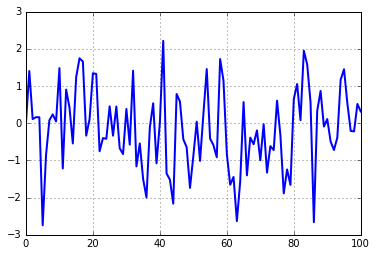

In [3]:
# Set the seed for the random number generator to 126
np.random.seed(126)

# Initialize values for T, y0, rho, and sigma
T = 101
y0 = 0
rho = 0.5
sigma = 1

# Initialize an array of zeros for y
y = np.zeros(T)

# Set the first value of y equal to y0
y[0] = y0

# Create a variable called 'epsilon' equal to an array containing T draws from the normal(0,sigma^2) process
eps= np.random.normal(loc=0,scale=sigma,size=T)

# Iterate over t in range(T-1) to compute y
for t in range(T-1):
    y[t+1] = rho*y[t] + eps[t+1]
    
# Plot y
plt.plot(y,lw=2)
plt.grid(linestyle=':')

The AR(1) process wtih $\rho = 0.5$ seems to fluctuate around the value $y=0$ and so the process appears to be stable

### Example

Simulate an AR(1) process for 101 periods ($t = 0,\ldots, 100$) using the following parameter values:

\begin{align}
\rho & = 1.5\\
\sigma &  = 1\\
y_0 & = 0
\end{align}

Plot the simulated values for $y$.

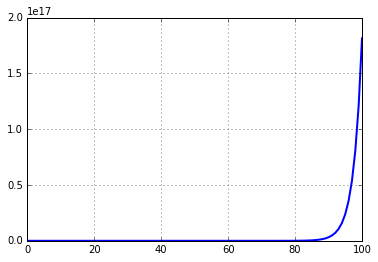

In [4]:
# Set the seed for the random number generator to 126
np.random.seed(126)

# Initialize values for T, y0, rho, and sigma
T = 101
y0 = 0
rho = 1.5
sigma = 1

# Initialize an array of zeros for y
y = np.zeros(T)

# Set the first value of y equal to y0
y[0] = y0

# Create a variable called 'epsilon' equal to an array containing T draws from the normal(0,sigma^2) process
eps= np.random.normal(loc=0,scale=sigma,size=T)

# Iterate over t in range(T-1) to compute y
for t in range(T-1):
    y[t+1] = rho*y[t] + eps[t+1]
    
# Plot y
plt.plot(y,lw=2)
plt.grid(linestyle=':')

The AR(1) process wtih $\rho = 1.5$ seems to be approaching infinity in magnitude and so the process appears to be explosive.

In general, like the first-order difference equation, if $|\rho| < 1$, the the AR(1) process is stable. If $|\rho|>1$ then the process is explosive. A special case is the *random walk process* which is an AR(1) process with $\rho = 1$. The random walk process has many important applications including asset pricing theory.

The function in the next cell computes a simulation of an AR(1) process.

In [5]:
# Define a function for simulating an AR(1) process. CELL PROVIDED
def ar1_sim(rho=0,sigma=1,y0=0,T=25):
    '''Funciton for simulating an AR(1) process for T periods
    
            Args:
            rho (float):   autoregressive parameter
            sigma (float): standard deviation of the white noise process
            y0 (float):    initial value of the process
            T (int):       number of periods to simulate
            
        Returns:
            numpy array
    '''
    
    # initialize y array
    y = np.zeros(T)
    y[0] = y0
    
    # draw random numbers for white noise process
    eps= np.random.normal(loc=0,scale=sigma,size=T-1)
    for t in range(T-1):
        y[t+1] = rho*y[t] + eps[t]
    
    return y

### Example:

Use the `ar1_sim()` function to simulate an AR(1) process for 201 periods ($t = 0,\ldots, 200$) using the following parameter values:

\begin{align}
\rho & = -0.99\\
\sigma &  = 0.5\\
y_0 & = 0
\end{align}

Set the seed for the NumPy random number generator to 126. Plot the simulated values for $y$.

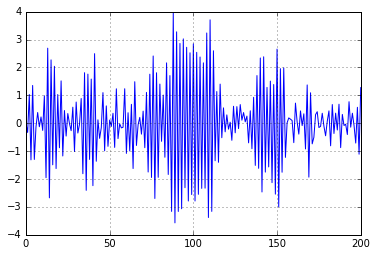

In [6]:
# Set the seed for the random number generator to 126
np.random.seed(126)

# Simulate y and plot
plt.plot(ar1_sim(rho=-0.99,sigma=0.5,y0=0,T=201))
plt.grid()

## Application: Estimate TFP as an AR(1) process

It is routine to model quarterly fulctuations in TFP as an AR(1) process and we will encounter this in our business cycle models. Here we will fit the following AR(1) model to US data:

\begin{align}
\log\left(A_t/A^{trend}_t\right) & = \rho \log\left(A_{t-1}/A^{trend}_{t-1}\right) + \epsilon_t
\end{align}

where $\log\left(A_t/A^{trend}_t\right) = \log A_t - \log A^{trend}$ is the log-deviation of TFP from its trend and $\epsilon_t$ is a white noize process with mean 0 and variance $\sigma^2$.


### The Data
The file `rbc_data_actual_trend.csv`, available at https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/rbc_data_actual_trend.csv, contains actual and trend data for real GDP per capita, real consumption per capita, real investment per capita, real physical capital per capita, TFP, and hours per capita at quarterly frequency. The GDP, consumption, investment, and capital data are in terms of 2012 dollars. Hours is measured as an index with the value in October 2012 set to 100. All of the data are *real* quantities. That is, there are no *nominal* quantities like money or inflation or a nominal interest rate. The reason is that the first theory that we will encounter is called *real business cycle* or RBC theory and, in that theory, there is no place for nominal quantities. RBC theory seeks to explain fluctuations in real quantities as being primarily due to TFP shocks; i.e., shocks to the production function.

### Objectives

1. Import TFP data (trend and actual) and compute cyclical component as log-deviation from trend.
2. Construct a scatter plot of log-deviation of TFP from trend against *lagged* log-deviation of TFP from trend.
3. Estimate the AR(1) model of log-deviation of TFP from trend to obtain estimates of $\rho$ and $\sigma$.

In [7]:
# Read business_cycle_data_actual_trend.csv into a Pandas DataFrame called 'df' with the first column set as the index and parse_dates=True
df = pd.read_csv('https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/rbc_data_actual_trend.csv',index_col=0,parse_dates=True)

/Users/bcjenkin/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


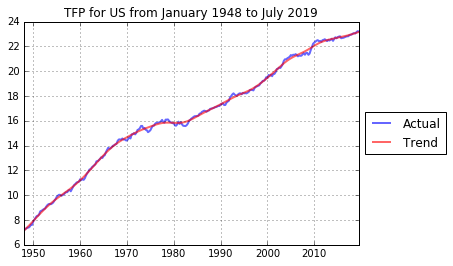

In [8]:
# Construct a plot of TFP with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
plt.plot(df['tfp'],lw=2,alpha=0.6,label='Actual')
plt.plot(df['tfp_trend'],'r',lw=2,alpha=0.6,label='Trend')
plt.title('TFP for US from '+df.index[0].strftime('%B %Y')+' to '+df.index[-1].strftime('%B %Y'))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

Now we need to compute the log-deviation of TFP from its trend. Note that since $\log(a/b) = \log(a) - \log(b)$, we can write:

\begin{align}
\log A_t - \log A^{trend} & = \log\left(A_t/A^{trend}_t\right)
\end{align}

The term on the right will make the AR(1) model easier to read.


\begin{align}
\log\left(A_t/A^{trend}_t\right) & = \rho \log\left(A_{t-1}/A^{trend}_{t-1}\right) + \epsilon_t
\end{align}




In [9]:
# Create a new column to df called tfp_cycle equal to the log difference between actual TFP and it's trend:
df['tfp_cycle'] = np.log(df['tfp']/df['tfp_trend'])

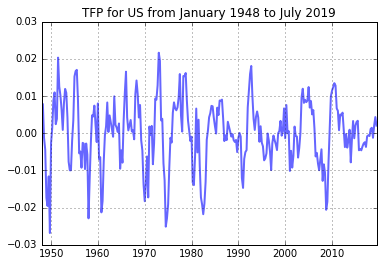

In [10]:
# Plot the log deviation of TFP from its trend (times 100)
plt.plot(df['tfp_cycle'],lw=2,alpha=0.6)
plt.title('TFP for US from '+df.index[0].strftime('%B %Y')+' to '+df.index[-1].strftime('%B %Y'))
plt.grid()

In [11]:
# Create a new column to df called tfp_cycle_lag that, for each date, contains values 
# in 'tfp_cycle' at the previous date
df['tfp_cycle_lag'] = df['tfp_cycle'].shift()

# Print the first five rows of only the 'tfp_cycle' and 'tfp_cycle_lag' columns. PROVIDED
print(df[['tfp_cycle','tfp_cycle_lag']].head())

            tfp_cycle  tfp_cycle_lag
1948-01-01   0.001157            NaN
1948-04-01   0.007843       0.001157
1948-07-01  -0.001230       0.007843
1948-10-01  -0.004375      -0.001230
1949-01-01  -0.017405      -0.004375


Notice that there is a missing value inthe `tfp_cycle_lag` column for the first date in the index because there is no prior observation in the `tfp_cycle` column. To proceed with the estimation, we need to get rid of the row with missing values.

In [12]:
# Use dropna() method on df to remove the row iwth the missing value
df= df.dropna()

# Print the first five rows of only the 'tfp_cycle' and 'tfp_cycle_lag' columns. PROVIDED
print(df[['tfp_cycle','tfp_cycle_lag']].head())

            tfp_cycle  tfp_cycle_lag
1948-04-01   0.007843       0.001157
1948-07-01  -0.001230       0.007843
1948-10-01  -0.004375      -0.001230
1949-01-01  -0.017405      -0.004375
1949-04-01  -0.019563      -0.017405


Next, we should make a scatter plot of log-deviation of TFP from trend against the one-period lag of log-deviation of TFP from trend to see if out AR(1) model is a good idea.

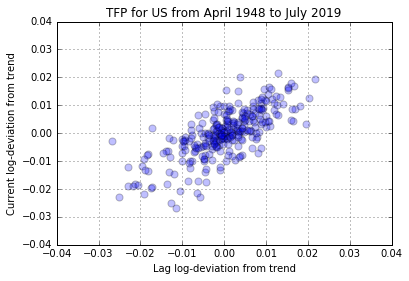

In [13]:
# Construct a scatter plot of log-deviation of TFP from trend against the one-period lag of log-deviation 
# of TFP from trend with:
#    1. scatter points sized at least 50, opacity (alpha) no greater than 0.25
#    2. x- and y-axis limits: [-0.04,0.04]
plt.scatter(df['tfp_cycle_lag'],df['tfp_cycle'],s=50,alpha=0.25)
plt.xlabel('Lag log-deviation from trend')
plt.ylabel('Current log-deviation from trend')
plt.title('TFP for US from '+df.index[0].strftime('%B %Y')+' to '+df.index[-1].strftime('%B %Y'))
plt.xlim([-0.04,0.04])
plt.ylim([-0.04,0.04])
plt.grid()

Now we use StatsModels to fit the model. First we estimate the AR(1) model to obtain an estimate of $\rho$. Then we find the standard deviation of the residuals of the regression to estimate $\sigma$.

In [14]:
# Create a variable 'X' to be the independent variable of the OLS model. Do not add a constant to X
X = df['tfp_cycle_lag']

# Create a variable 'Y' to be the dependent variable of the OLS model.
Y = df['tfp_cycle']

# Create a variable called 'model' that initializes the OLS model
model = sm.OLS(Y,X)

# Create a variable called 'results' that stores the results of the estimated OLS model
results = model.fit()

# Print output of summary2() method of results
print(results.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.540     
Dependent Variable:     tfp_cycle        AIC:                         -2124.8056
Date:                   2020-02-12 12:52 BIC:                         -2121.1497
No. Observations:       286              Log-Likelihood:              1063.4    
Df Model:               1                F-statistic:                 336.5     
Df Residuals:           285              Prob (F-statistic):          3.57e-50  
R-squared (uncentered): 0.541            Scale:                       3.4631e-05
------------------------------------------------------------------------------------
                    Coef.      Std.Err.        t        P>|t|      [0.025     0.975]
------------------------------------------------------------------------------------
tfp_cycle_lag       0.7359       0.0401     18.3450     0.0000     0.6569     0.8148
-------------------------------------

Estimated coefficients are stored as a Pandas `Series` in the `params` attribute of `results`. Index values correspond to names of columns in the dependent variable `X`

In [15]:
# Print the contents of the params method of results
print(results.params)

tfp_cycle_lag    0.735887
dtype: float64


In [16]:
# Create a variable called 'rho' that equals the value of the estimated coefficient on df['tfp_cycle_lag']
rho = results.params['tfp_cycle_lag']

The residuals from the regression are stored in an attribute of `results` called `resid`

In [17]:
# Create a variable called 'sigma' that equals the standard deviation of the residuals of the regression
sigma = results.resid.std()

# Print the value of sigma
print(sigma)

0.00588482113457377


And that's how you estimate the parameters of an AR(1) model of the cyclical component of TFP for the US.

## Application: A Stochastic Solow Growth Model (Optional)

Consider the Solow growth model with written in "per worker" terms:

\begin{align}
y_t & = A_tk_t^{\alpha}\\
k_{t+1} & = i_t + (1-\delta)k_{t}\\
y_t & = c_t + i_t\\
c_t & = (1-s)y_t,
\end{align}

where $y_t$ is output per worker, $k_t$ is capital per worker, $c_t$ is consumption per worker, $i_t$ is investment per worker, and $A_t$ is time-varying TFP. Assume:

\begin{align}
\log A_{t+1} & = \rho \log A_{t} + \epsilon_{t+1}
\end{align}

where $\epsilon_t$ is a white noise process with mean 0 and variance $\sigma^2$. Since capital and TFP are the only two variables, that depend on past value of themselves, they are the two state variables of the model. Therefore, we can simulate simulate the model in two steps. First, simulate $k_t$ and $A_t$ using the following two laws of motion:

\begin{align}
k_{t+1} & = sAk_t^{\alpha} + (1-\delta)k_{t} \label{eqn:capital_solution}\\
\log A_{t+1} & = \rho \log A_{t} + \epsilon_{t+1}. \label{eqn:tfp_solution}
\end{align}

Second, compute simulated values for $y_t$, $c_t$, and $i_t$ using the following static relationships:

\begin{align}
y_t & = A_tk_t^{\alpha}\\
i_t & = sA_tk_t^{\alpha}\\
c_t & = (1-s)A_tk_t^{\alpha},
\end{align}

In the previous example, we estimated $\rho$ and $\sigma$ for the US so let's use those values for this simulation. For the other parameter, use the following values for the simulation:

| $A_0$ | $k_0$ | $s$ | $\alpha$ | $\delta $ | $T$  |
|-------|-------|-----|----------|-----------|------|
| 1     | 8.43  | 0.1 | 0.35     |  0.025    | 201  |

Where $T$ is the total number of simulation periods (i.e., $t$ will range from $0$ to $200$).

### Function

The function in the next cell simulates a stochastic Solow growth model. It returns a `DataFrame` with columns equal to the log-deviations of the simulated variables relative to the trend (i.e., nonstochastic steady state) implied by the model.

In [18]:
# Define a function that returns a DataFrame of simulated value from the Solow model with exogenous labor and TFP growth. CELL PROVIDED
def solow_stochastic(s,alpha,delta,k0,A0,rho,sigma,T):
    
    '''Function for computing a simulation of the Solow growth model with exogenous labor and TFP growth.
    
            y[t]   = A[t]*K[t]^alpha
            k[t+1] = i[t] + (1-delta)*k[t]
            y[t]   = c[t] + i[t]
            c[t]   = (1-s)*y[t]
            A[t+1] = exp(rho*logA[t] + epsilon[t+1])
    
    Args:
        s (float):      Saving rate
        alpha (float):  Capital share in Cobb-Douglas production function
        delta (float):  Capital depreciation rate
        T (int):        Number of periods to simulate
        k0 (float):     Initial value of capital per worker
        A0 (float):     Initial TFP
        rho (float):    AR coeficient for log A[t]
        sigma (float):  Standard deviation of shock to log A[t]
     
     Returns:
         Pandas DataFrame
     '''
    # Create epsilon values
    epsilon = np.random.normal(scale=sigma,size=T)
    
    # Initialize capital values
    capital = np.zeros(T)

    # Set first value of capital equal to k0
    capital[0] = k0
    
    # Initialize TFP values
    tfp = np.zeros(T)

    # Set first value of TFP equal to A0
    tfp[0] = A0

    # Iterate over t in range(T-1) to update subsequent values in the capital and tfp arrays
    for t in range(T-1):
        capital[t+1] = s*tfp[t]*capital[t]**alpha + (1-delta)*capital[t]
        tfp[t+1] = np.exp(rho*np.log(tfp[t]) + epsilon[t])
    
    # Compute the values of the other aggregate variables
    output = tfp*capital**alpha
    consumption = (1-s)*output
    investment = s*output
    
    # Compute steady state (or trend) of endogenous vars
    capital_ss = (s/delta)**(1/(1-alpha))
    tfp_ss = 1 
    output_ss = tfp_ss*capital_ss**alpha
    consumption_ss = (1-s)*output_ss
    investment_ss = s*output_ss
    
    
    # Put simulated data into a DataFrame
    df = pd.DataFrame({'output_log_dev':np.log(output/output_ss),
                       'consumption_log_dev':np.log(consumption/consumption_ss),
                       'investment_log_dev':np.log(investment/investment_ss),
                       'capital_log_dev':np.log(capital/capital_ss),
                       'tfp_log_dev':np.log(tfp/tfp_ss)})
    
    # Return the simulated data
    return df

### Simulate the Stochastic Solow Model

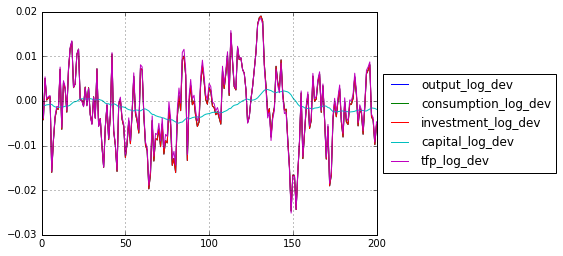

In [19]:
# CELL PROVIDED
# Set parameters for simulation
alpha=0.35
s = 0.1
delta = 0.025
k0 = 8.43
A0=1
T = 201

np.random.seed(126)
# Simulate the model and store output in a variable called 'solow_df'
solow_df = solow_stochastic(s,alpha,delta,k0,A0,rho,sigma,T)

# Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
solow_df.plot(ax=ax,grid=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Simulation Results

Compute the standard deviation of the simulated data and the correlation coefficients of the simulated data.

In [20]:
# Standard deviations. CELL PROVIDED
solow_df.std()*100

output_log_dev         0.791095
consumption_log_dev    0.791095
investment_log_dev     0.791095
capital_log_dev        0.173041
tfp_log_dev            0.783475
dtype: float64

In [21]:
# Correlation coefficients. CELL PROVIDED
solow_df.corr()

,output_log_dev,consumption_log_dev,investment_log_dev,capital_log_dev,tfp_log_dev
output_log_dev,1.000000,1.000000,1.000000,0.163488,0.997088
consumption_log_dev,1.000000,1.000000,1.000000,0.163488,0.997088
investment_log_dev,1.000000,1.000000,1.000000,0.163488,0.997088
capital_log_dev,0.163488,0.163488,0.163488,1.000000,0.087776
tfp_log_dev,0.997088,0.997088,0.997088,0.087776,1.000000


It looks like the stochastic Solow model does a good job replicating the volatility (standard deviation) of ouput and consumption relative to the data. However the simulated investment volatility is too small by about a factor of 6. The stochastic Solow model does capture the correlation between output, consumption, and investment, but it implies perfect correlation which is too much.

## The Random Walk Process (Optional)

The *random walk process* is an AR(1) process with $\rho=1$:

\begin{align}
y_t = y_{t-1} + \epsilon_t
\end{align}

The random walk process has an important place in finance since the evidence suggests that stock prices follow a random walk process.

### Example

Simulate 7 random walk processes for 501 periods. Set $\sigma = 1$. Plot all 7 simulated processes on the same axes.

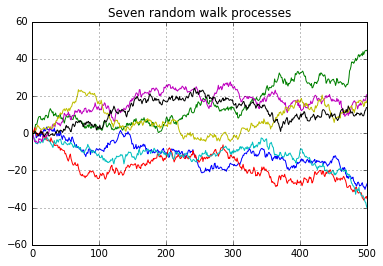

In [22]:
# CELL PROVIDED 
np.random.seed(126)
for i in range(7):
    plt.plot(ar1_sim(rho=1,T=501))
    
plt.title('Seven random walk processes')
plt.grid()